# Demo of the L-Wigner Distribution and the Polynomial WV from STFT & SM

### Based on algorithms in Boashash+ 2015 p349 (6.2.17) & p350 (6.2.19) 


In [3]:
using Winston;
using Color;
using PyPlot
import DSP

In [4]:
include("../juwvid.jl")

juwvid

### multi frequency-components data (Boashash+15,p346,Example 6.2.3)

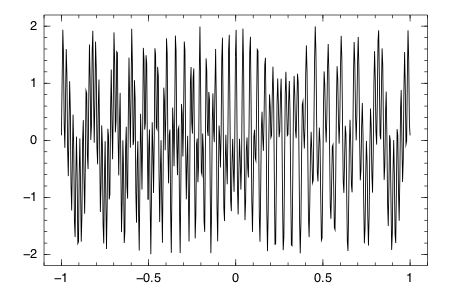

In [5]:
nsample=512
t,x=sampledata.genmultifm623(nsample);
Winston.plot(t,x)

### S-method (constant Lp)

In [85]:
sm=smethod.tfrsm(x,4,NaN,2);

Use fft.


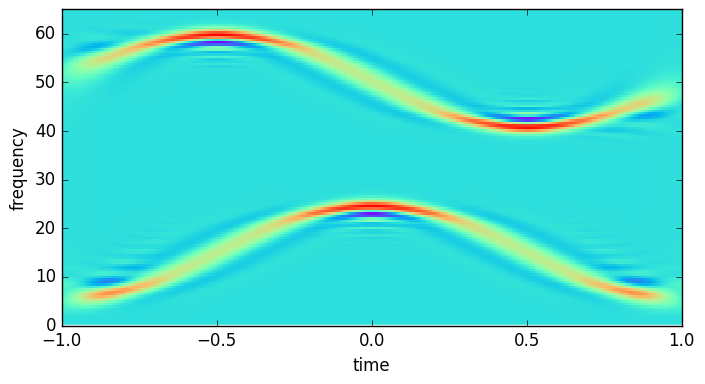

(0,65)

In [96]:
a=juwplot.wtfrshow(sm,t[2]-t[1],t[1],t[end],NaN,NaN,1.0,"rainbow")
PyPlot.xlabel("time")
PyPlot.ylabel("frequency")
PyPlot.ylim(0,65)

### L-Wigner Distribution (L=2)

Use fft.


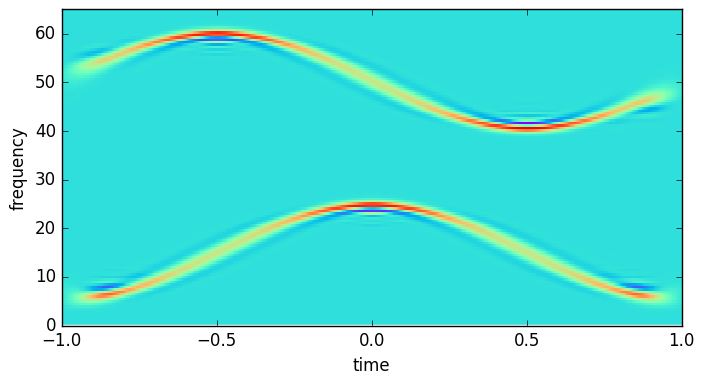

(0,65)

In [95]:
#alias free sm
afwv=smethod.tfrsm(x,4,NaN,2)
#L wigner distribution (L=2)
tfrlw2=lwigner.tfrlw2L(afwv,4);
a=juwplot.wtfrshow(tfrlw2,t[2]-t[1],t[1],t[end],NaN,NaN,1.0,"rainbow")
PyPlot.xlabel("time")
PyPlot.ylabel("frequency")
PyPlot.ylim(0,65)

### polynomial Wigner Ville distribution

Use fft.


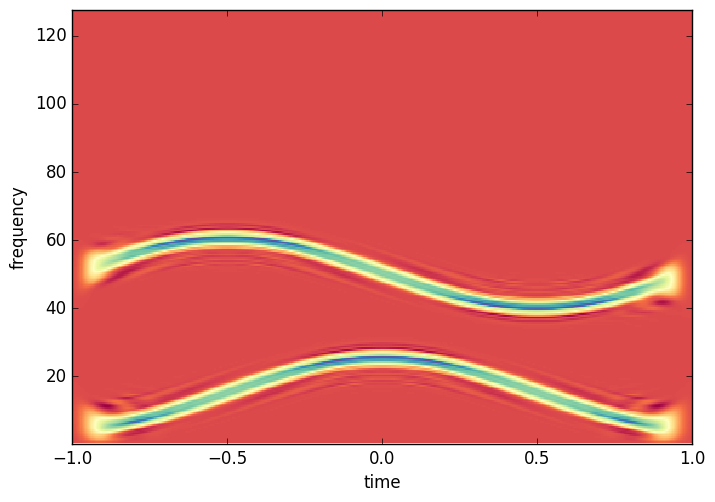

PyObject <matplotlib.text.Text object at 0x31a94f0d0>

In [8]:
trfpo=polywv.tfrpowv(x,NaN,NaN,NaN,2,8);
a=juwplot.wtfrshow(trfpo,t[2]-t[1],t[1],t[end],NaN,NaN,0.7,"Spectral")
PyPlot.xlabel("time")
PyPlot.ylabel("frequency")
#PyPlot.ylim(0,65)